In [29]:
# tabular manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

# sklearn for scaling and clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# environment
from env import get_db_url

import warnings
warnings.filterwarnings("ignore")

### 1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [2]:
# call function to read sql query 

sql_query = """
select *
from grocery_customers
"""

df = pd.read_sql(sql_query, get_db_url('grocery_db'), index_col="customer_id")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# select features to examine

selected_feats = ['Fresh', 'Frozen', 'Detergents_Paper']

In [5]:
# We will create a scaler:
# Make it
# Fit it
# Use it
minmax = MinMaxScaler()

In [6]:
scaled_features = minmax.fit_transform(df[selected_feats])


In [7]:
# examine our numpy array
scaled_features

array([[0.11294004, 0.0031063 , 0.0654272 ],
       [0.06289903, 0.02854842, 0.08058985],
       [0.05662161, 0.03911643, 0.08605232],
       ...,
       [0.1295431 , 0.00677142, 0.36346267],
       [0.091727  , 0.01664914, 0.00404174],
       [0.02482434, 0.00065742, 0.01161082]])

In [8]:
# note: the output of the scaler is already a numpy array
# this is suitable for feeding into our DBSCAN model
type(scaled_features)

numpy.ndarray

In [9]:
# glue the scaled information back into df:
scaled_cols = [col + '_scaled' for col in selected_feats]

In [10]:
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=scaled_cols)
scaled_df

,Fresh_scaled,Frozen_scaled,Detergents_Paper_scaled
customer_id,,,
0,0.112940,0.003106,0.065427
1,0.062899,0.028548,0.080590
2,0.056622,0.039116,0.086052
3,0.118254,0.104842,0.012346
4,0.201626,0.063934,0.043455
...,...,...,...
435,0.264829,0.215469,0.004385
436,0.349761,0.073713,0.002205
437,0.129543,0.006771,0.363463


In [11]:
df = df.merge(scaled_df, on=df.index)

In [12]:
df.head()

,key_0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_scaled,Frozen_scaled,Detergents_Paper_scaled
0,0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.003106,0.065427
1,1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.028548,0.080590
2,2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.039116,0.086052
3,3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.104842,0.012346
4,4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.063934,0.043455


### Create the DBScan object

- Make it 
- Fit it
- Use it

In [13]:
# check shape of df
df.shape

(440, 12)

In [14]:
# make the object
dbsc = DBSCAN(eps = 0.1, min_samples=20)

In [15]:
# fit it
dbsc.fit(scaled_features)


DBSCAN(eps=0.1, min_samples=20)

In [16]:
# use it:
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [17]:
# add labels column to df
df['labels'] = dbsc.labels_

In [18]:
df[selected_feats + ['labels']].head()

,Fresh,Frozen,Detergents_Paper,labels
0,12669,214,2674,0
1,7057,1762,3293,0
2,6353,2405,3516,0
3,13265,6404,507,0
4,22615,3915,1777,0


In [19]:
df.labels.value_counts()


 0    417
-1     23
Name: labels, dtype: int64

We have our cluster labels now:
- Clusters: 1 (label: 0)
- Outliers: (Label: -1)

### Explore the selected features

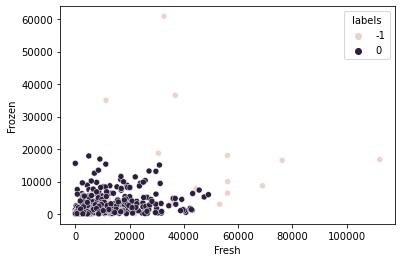

In [24]:
sns.scatterplot(x='Fresh',y='Frozen', hue='labels', data=df)
plt.show()

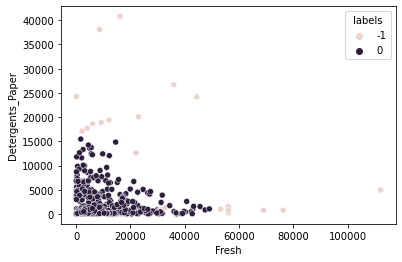

In [25]:
sns.scatterplot(x='Fresh',y='Detergents_Paper', hue='labels', data=df)
plt.show()

Initial Takeaways:
 - We have at least ~10 points that are definite outliers
 - We have some data points that may or may not belong to the main cluster
 - Out of the dimensions we observed, there does not appear to be need for more than one cluster
 - We may want to be less strict about our hyperparemters to catch the data points that arent as extreme as the furthest outliers in the data set

### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.


In [30]:
file_name = 'anonymized-curriculum-access-07-2021.txt'
col_names = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']

df = pd.read_csv(file_name, sep="\s", header=None, names=col_names, usecols=[0, 2, 3, 4, 5])

In [31]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [32]:
selected_feats = ['source_ip']

In [33]:
minmax = MinMaxScaler()